In [3]:
import pandas as pd # use for data manipulation and analysis
import numpy as np # use for multi-dimensional array and matrix
import os
import seaborn as sns # use for high-level interface for drawing attractive and informative statistical graphics 
import matplotlib.pyplot as plt # It provides an object-oriented API for embedding plots into applications
%matplotlib inline 
# It sets the backend of matplotlib to the 'inline' backend:
import time # calculate time 

from sklearn.linear_model import LogisticRegression # algo use to predict good or bad
from sklearn.naive_bayes import MultinomialNB # nlp algo use to predict good or bad
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # spliting the data between feature and target
from sklearn.metrics import classification_report, accuracy_score # gives whole report about metrics (e.g, recall,precision,f1_score,c_m)
from sklearn.metrics import confusion_matrix # gives info about actual and predict
from nltk.tokenize import RegexpTokenizer # regexp tokenizers use to split words from text  
from nltk.stem.snowball import SnowballStemmer # stemmes words
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # create sparse matrix of words using regexptokenizes  
from sklearn.pipeline import make_pipeline # use for combining all prerocessors techniuqes and algos
from sklearn.pipeline import Pipeline
from PIL import Image # getting images in notebook
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator# creates words colud

from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome 
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle# use to dump model 

import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')
#Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [4]:
#import dataset and read using pandas library
df = pd.read_csv('phishing_site_urls.csv')
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


In [5]:
#conversion of dataset to dataframe
df1 = pd.DataFrame(df)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [6]:
#find null value of each colunm 
df1.isnull().sum()

URL      0
Label    0
dtype: int64

In [7]:
#creating a dataframe to count number of each component
label_count = pd.DataFrame(df.Label.value_counts())
label_count


,Label
good,392924
bad,156422


<AxesSubplot:ylabel='Label'>

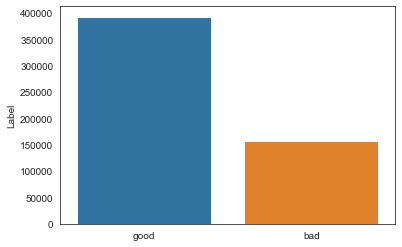

In [8]:
# visualization of our taget column
sns.set_style("white")
sns.despine()
sns.barplot(label_count.index,label_count.Label)

In [9]:
#tokenize data: mean to vectorize our url to other word

tokenizer = RegexpTokenizer(r'[A-Za-z]+')

df.URL[0]


'nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526'

In [10]:
# this will be pull letter which matches to expression
tokenizer.tokenize(df1.URL[0])

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [11]:
#creating colunm which content tokenize value to add in our data set
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 9.184606599999825 sec


In [12]:
print(t0)

159979.3510993


In [13]:
#display dataset
df.sample(5)

,URL,Label,text_tokenized
352511,hockeydb.com/ihdb/stats/leagues/seasons/teams/...,good,"[hockeydb, com, ihdb, stats, leagues, seasons,..."
297264,bzzagent.com/bzzscapes/scape/arthur-bryant-s-r...,good,"[bzzagent, com, bzzscapes, scape, arthur, brya..."
327229,facebook.com/georges.huard,good,"[facebook, com, georges, huard]"
527904,joomlastats.a-inet.net/,bad,"[joomlastats, a, inet, net]"
428058,scottisharchitects.org.uk/architect_list.php?a...,good,"[scottisharchitects, org, uk, architect, list,..."


In [14]:
#Snowball is a small string processing language, gives root words to reduce large word to short ones
stemmer = SnowballStemmer("english") # choose a language

In [15]:
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 69.54764689999865 sec


In [16]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
345155,geni.com/projects/Medal-of-Honour,good,"[geni, com, projects, Medal, of, Honour]","[geni, com, project, medal, of, honour]"
491619,www.faw.cl/images/fotos/web/citadelka/cp.php?m...,bad,"[www, faw, cl, images, fotos, web, citadelka, ...","[www, faw, cl, imag, foto, web, citadelka, cp,..."
197917,homepages.rootsweb.ancestry.com/~maryc/brant77...,good,"[homepages, rootsweb, ancestry, com, maryc, br...","[homepag, rootsweb, ancestri, com, maryc, bran..."
16988,ohdmuseum.com/aspnet_client/system_web/secuuur...,bad,"[ohdmuseum, com, aspnet, client, system, web, ...","[ohdmuseum, com, aspnet, client, system, web, ..."
516340,dfoabbcbnkelbeef.co.uk /,bad,"[dfoabbcbnkelbeef, co, uk]","[dfoabbcbnkelbeef, co, uk]"


In [17]:
#joining stemmed word
print('Getting joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.3997488000022713 sec


In [18]:
df.sample(5)


,URL,Label,text_tokenized,text_stemmed,text_sent
218878,muzikholic.blogspot.com/2009/07/bob-brookmeyer...,good,"[muzikholic, blogspot, com, bob, brookmeyer, h...","[muzikhol, blogspot, com, bob, brookmey, html]",muzikhol blogspot com bob brookmey html
420774,realtor.com/property-search/Arizona-City_AZ/S-...,good,"[realtor, com, property, search, Arizona, City...","[realtor, com, properti, search, arizona, citi...",realtor com properti search arizona citi az s ...
429401,seobythesea.com/2007/08/girl-scouts-with-guns-...,good,"[seobythesea, com, girl, scouts, with, guns, g...","[seobythesea, com, girl, scout, with, gun, geo...",seobythesea com girl scout with gun geograph c...
99661,cngtl.com/di0lI3Ga9ro3/indexx.php?personal=98610,bad,"[cngtl, com, di, lI, Ga, ro, indexx, php, pers...","[cngtl, com, di, li, ga, ro, indexx, php, person]",cngtl com di li ga ro indexx php person
162,www.halimshop.com/include/custom/verified/us/F...,bad,"[www, halimshop, com, include, custom, verifie...","[www, halimshop, com, includ, custom, verifi, ...",www halimshop com includ custom verifi us full...


In [19]:
df

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
...,...,...,...,...,...
549341,23.227.196.215/,bad,[],[],
549342,apple-checker.org/,bad,"[apple, checker, org]","[appl, checker, org]",appl checker org
549343,apple-iclods.org/,bad,"[apple, iclods, org]","[appl, iclod, org]",appl iclod org
549344,apple-uptoday.org/,bad,"[apple, uptoday, org]","[appl, uptoday, org]",appl uptoday org


Visualisation of data
1. Visualize some important keys using word cloud

In [20]:
#sliceing classes
bad_sit = df[df.Label == 'bad']
good_sit = df[df.Label == 'good']

In [21]:
good_sit.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [22]:
bad_sit.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


Function to visualize data

In [23]:
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com','http'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud)
        plt.title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()  

In [24]:
data = good_sit.text_sent
data.reset_index(drop=True, inplace=True)

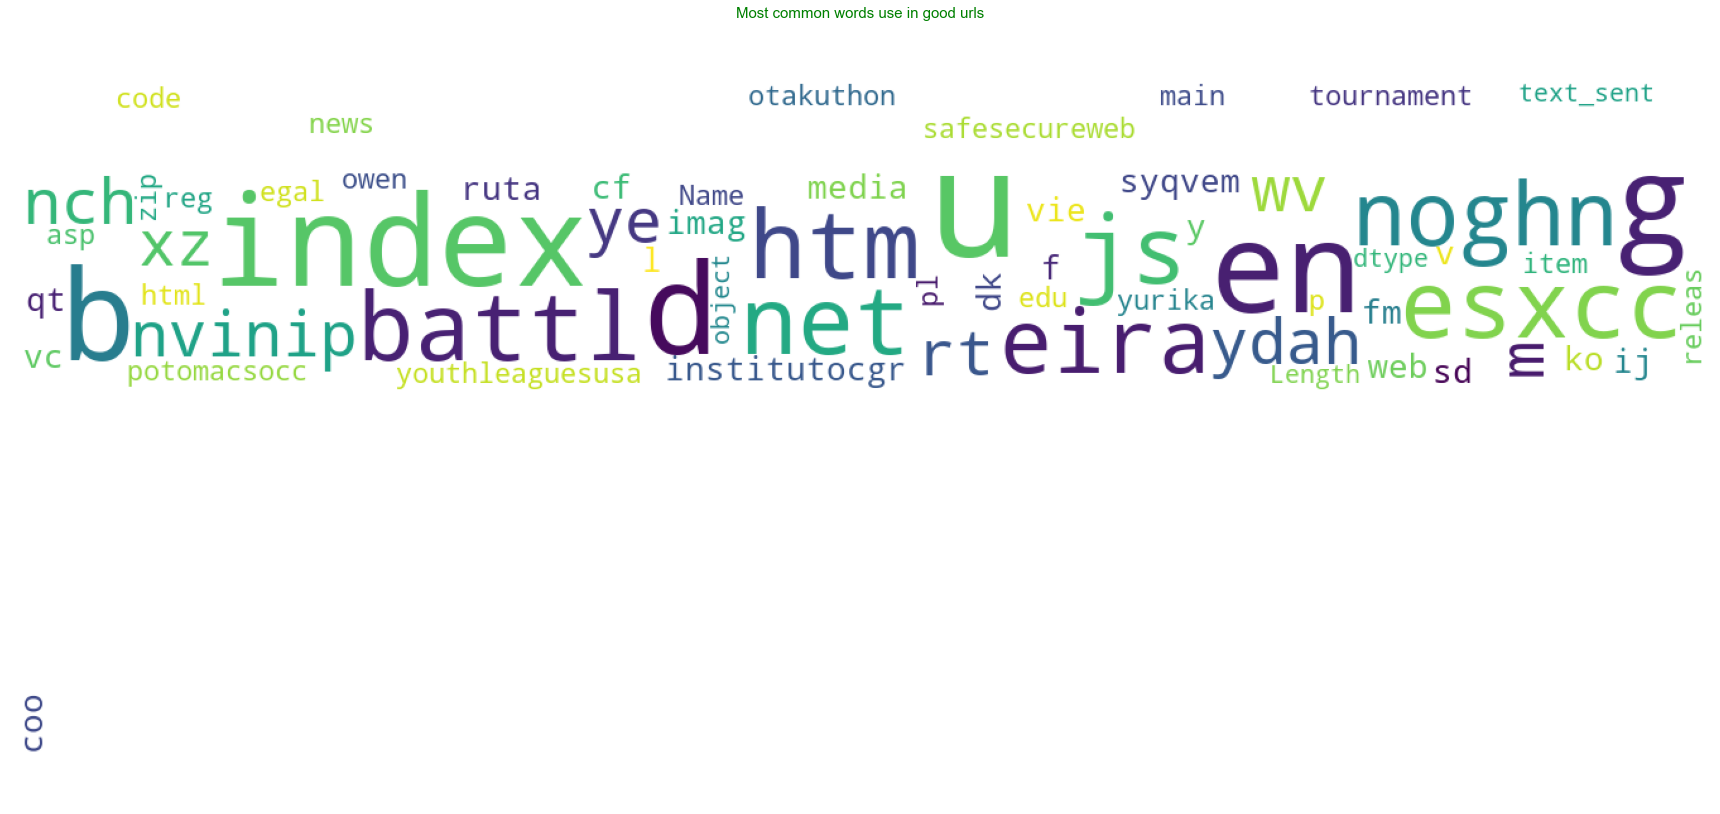

In [25]:
common_text = str(data)
with Image.open("img.PNG") as image:
    image.save("ima.PNG")
    common_mask = np.array(image)
  
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in good urls', title_size=15)

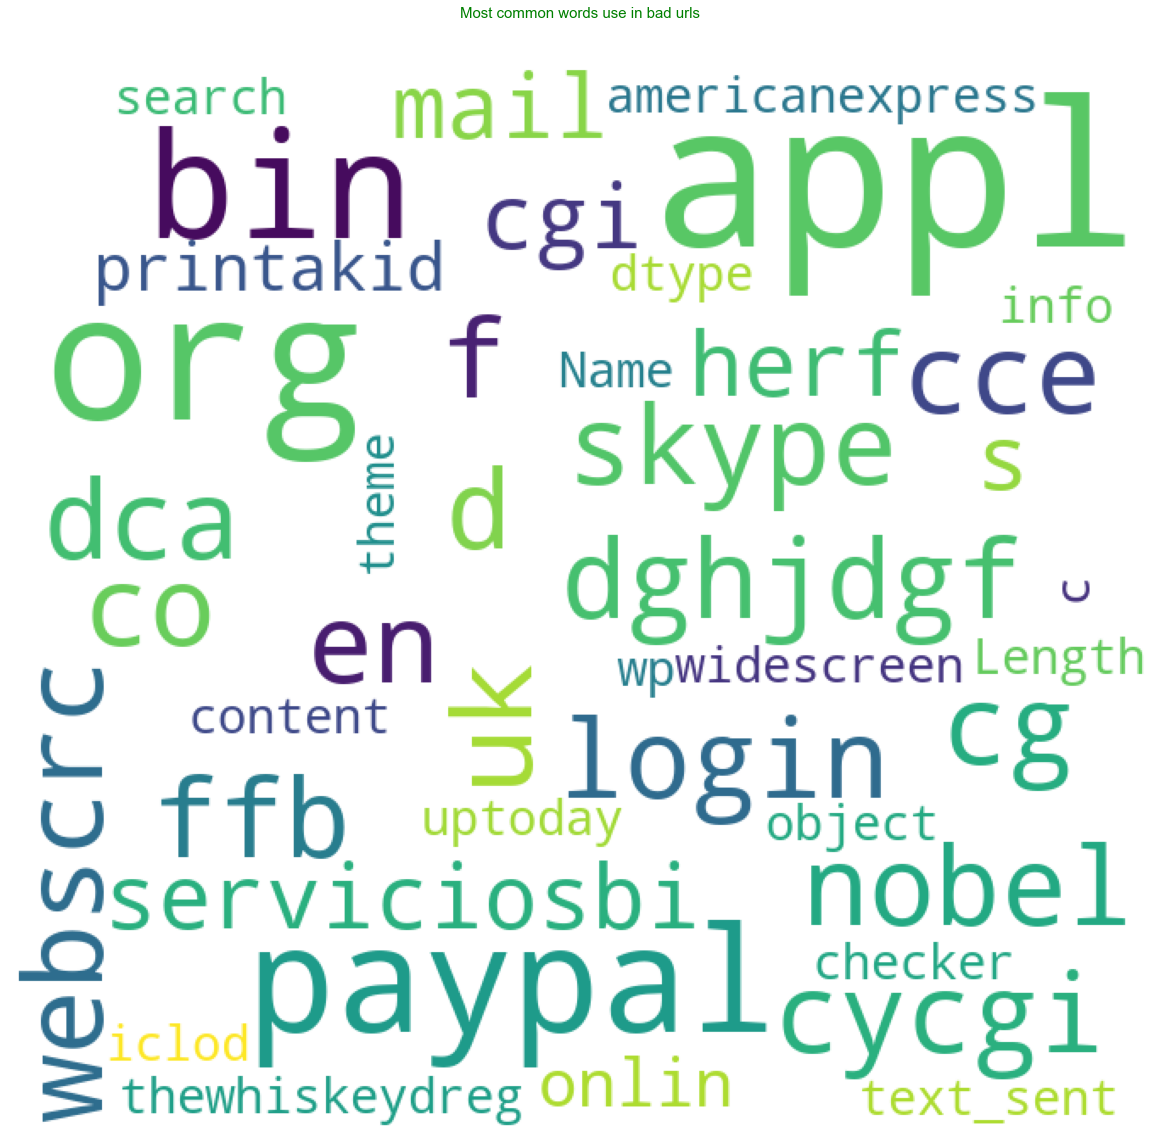

In [26]:
data = bad_sit.text_sent
data.reset_index(drop=True, inplace=True)

common_text = str(data)
common_mask = np.array(Image.open('comment.PNG'))
plot_wordcloud(common_text, common_mask, max_words=400, max_font_size=120, 
               title = 'Most common words use in bad urls', title_size=15)

2. Visualize internal links, it will shows all redirect links.

Scrape any website
First, setting up the Chrome webdriver so we can scrape dynamic web pages.
Chrome webdriver
WebDriver tool use for automated testing of webapps across many browsers. It provides capabilities for navigating to web pages, user input and more

In [27]:
#scraping web site using chrome browser extension
path= "D:\phishing_Urls\chromedriver.exe"
browser = webdriver.Chrome(path)
# browser.get('http://login.marwadiuniversity.ac.in')
# print(browser.page_source)

In [28]:
list_urls = ["http://login.marwadiuniversity.ac.in","http://marwadiuniversity.ac.in"] #here i take phishing sites 
links_with_text = []

In [29]:
for url in list_urls:
    browser.get(url)
    soup = BeautifulSoup(browser.page_source,"html.parser")
    for line in soup.find_all('a'):
        href = line.get('href')
        links_with_text.append([url, href])
links_with_text

In [ ]:
dataf = pd.DataFrame(links_with_text, columns=["from", "to"])
dataf.shape

(411, 2)

In [ ]:
GA = nx.from_pandas_edgelist(dataf, source="from", target="to")
nx.draw(GA, with_labels=False)

ValueError: None cannot be a node

In [ ]:
#create cv object: convert all data to matrix
cv = CountVectorizer()

In [ ]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed
feature
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label)

LogisticRegression
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# using of logic regressiosn classification model
lr = LogisticRegression()
lr.fit(trainX,trainY)
lr.score(testX,testY)

0.9639718357034157

In [ ]:
#creat a dictionnary
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),5)

Scores_ml

{'Logistic Regression': 0.96332}

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:


# sgd = Pipeline([('vect', CountVectorizer()),
#                 ('tfidf', TfidfTransformer()),
#                 ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
#                ])
# sgd.fit(trainX, trainY)



# y_pred = sgd.predict(testX)


AttributeError: lower not found

In [ ]:
# print('Training Accuracy :',sgd.score(trainX,trainY))
# print('Testing Accuracy :',sgd.score(testX,testY))
# print('accuracy %s' % accuracy_score(y_pred, testY))
# print(classification_report(testY, y_pred,target_names=['Bad','Good']))

NotFittedError: Vocabulary not fitted or provided

In [ ]:
# Scores_ml['SGDClassifier'] = np.round(sgd.score(testX,testY),5)

NameError: name 'sgd' is not defined

{'Logistic Regression': 0.96499}

Training Accuracy : 0.978240766585196
Testing Accuracy : 0.963818927164566

CLASSIFICATION REPORT LOGISTIC REGRESSION

              precision    recall  f1-score   support

         Bad       0.91      0.96      0.93     36899
        Good       0.99      0.96      0.97    100438

    accuracy                           0.96    137337
   macro avg       0.95      0.96      0.95    137337
weighted avg       0.97      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

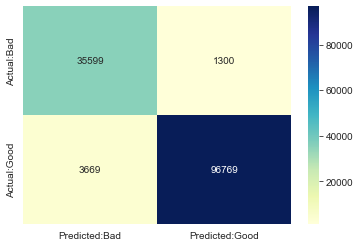

In [ ]:
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT LOGISTIC REGRESSION\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
# create mnb object
mnb = MultinomialNB()
mnb.fit(trainX,trainY)
mnb.score(testX,testY)


0.958918572562383

In [ ]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),5)

Training Accuracy : 0.9742262911732511
Testing Accuracy : 0.9570909514551796

CLASSIFICATION REPORT FOR  MULTINOMIAL NAIVE BAYE

              precision    recall  f1-score   support

         Bad       0.91      0.94      0.92     38313
        Good       0.97      0.97      0.97     99024

    accuracy                           0.96    137337
   macro avg       0.94      0.95      0.95    137337
weighted avg       0.96      0.96      0.96    137337


CONFUSION MATRIX


<AxesSubplot:>

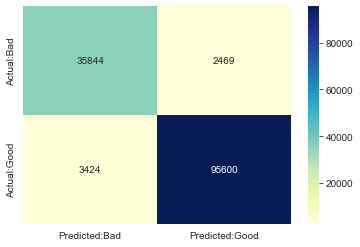

In [ ]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT FOR  MULTINOMIAL NAIVE BAYE\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

<AxesSubplot:ylabel='Accuracy'>

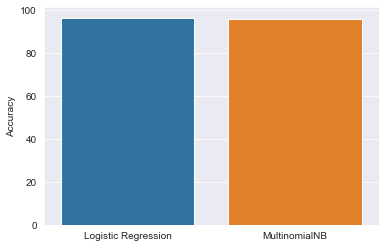

In [ ]:
acc = pd.DataFrame.from_dict(Scores_ml,orient = 'index',columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(acc.index,acc.Accuracy*100)

In [ ]:
acc.head()

,Accuracy
Logistic Regression,0.96499
MultinomialNB,0.95892


In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 

In [ ]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [ ]:
pipeline_ls.fit(trainX,trainY)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(testX,testY) 

0.9670154437624238

In [ ]:
pipeline_MB = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), MultinomialNB())

##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)
pipeline_MB.fit(trainX,trainY)
pipeline_MB.score(testX,testY) 

0.9639135848314729

In [ ]:
pipeline_SB = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), SGDClassifier())

##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)
pipeline_SB.fit(trainX,trainY)
pipeline_SB.score(testX,testY) 

0.9373948753795408

Training Accuracy : 0.9815683637978782
Testing Accuracy : 0.9670154437624238

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     37029
        Good       0.99      0.97      0.98    100308

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<AxesSubplot:>

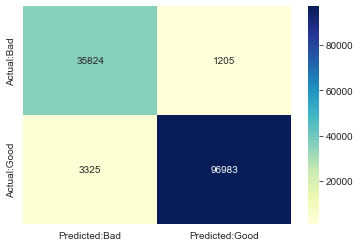

In [ ]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [ ]:
pickle.dump(pipeline_ls,open('phishing.pkl','wb'))

In [ ]:
pickle.dump(pipeline_MB,open('phish.pkl','wb'))

In [ ]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())
##(r'\b(?:http|ftp)s?://\S*\w|\w+|[^\w\s]+') ([a-zA-Z]+)([0-9]+) -- these tolenizers giving me low accuray 
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(testX,testY)
print(result)

0.9670154437624238


In [ ]:
loaded_ = pickle.load(open('phish.pkl', 'rb'))
result = loaded_.score(testX,testY)
print(result)

0.9715735744919431


In [ ]:
list_site= ["https://www.sanagustinturismo.co/Facebook/",
"https://www.facebook.pcriot.com/login.php",
"https://deadlyplayerx.binhoster.com/Facebook/securelogin.php",
"https://facelook.shop.co/login.php",
"https://sigininto.horizon-host.com/facbook/facebook.php",
"https://custom-facebook.info/facebook.htm",
"https://www.profile.co.gp/facebook",
"https://s6.mywibes.com/facebook.htm",
"https://www.fjtech.us/",
"https://www.sjscheat.com/Hosting%20blogger/facebook",
"https://h1.ripway.com/denal/",
"https://1337r00t.13.ohost.de/r00tw00tkn00wn/",
"https://faacebok.zapto.org/" ,
"https://h4ck3rgadungan.adfoo.info/index1.html",
"https://www.2498.b.hostable.me/", 'youtube.com/','youtube.com/watch?v=qI0TQJI3vdU']
list_good=['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html', "https://faacebok.zapto.org/"]

In [ ]:

list_good=['restorevisioncenters.com/html/technology.html', 'youtube.com/']
list_bad=["https://faacebok.zapto.org/","https://h1.ripway.com/denal/"]
loaded_mo = pickle.load(open('phish.pkl', 'rb'))
results = loaded_mo.predict(list_good)
result3 = loaded_mo.predict(list_bad)

In [ ]:
print(results)
print("*"*30)
print(result3)

['good' 'good']
******************************
['bad' 'bad']


In [ ]:
predict_bad = ['yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php','fazan-pacir.rs/temp/libraries/ipad','tubemoviez.exe','svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt','youtube.com/']
predict_good = ['youtube.com/','youtube.com/watch?v=qI0TQJI3vdU','retailhellunderground.com/','restorevisioncenters.com/html/technology.html']
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
#predict_bad = vectorizers.transform(predict_bad)
# predict_good = vectorizer.transform(predict_good)
result = loaded_model.predict(predict_bad)
result2 = loaded_model.predict(predict_good)
print(result)
print("*"*30)
print(result2)

['bad' 'bad' 'bad' 'bad' 'good']
******************************
['good' 'good' 'good' 'good']
